### Load Dataset

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = datasets.FashionMNIST(
	root='data',
 	train=True,
	download=True,
	transform=transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
	root='data',
	train=False,
	download=True,
	transform=transforms.ToTensor()
)

In [22]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

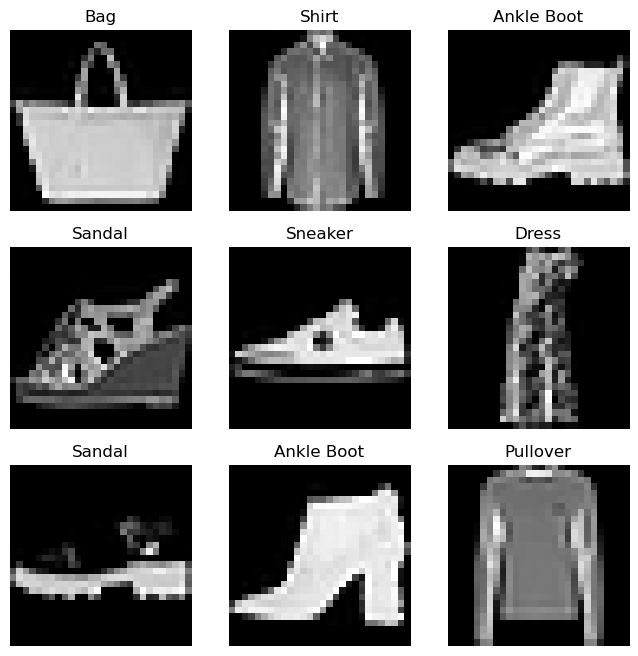

In [7]:
figure = plt.figure(figsize=(8,8))
rows, cols = 3, 3
for i in range(1, rows * cols + 1):
    sample_idx = torch.randint(len(train_data), size=(1, )).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(labels_map[label])
    plt.axis("off")
    
plt.show()

In [8]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [11]:
train_features, train_labels = next(iter(train_dataloader))

In [13]:
print(train_features.shape)
print(train_labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [14]:
img = train_features[0].squeeze()
label = train_labels[0]

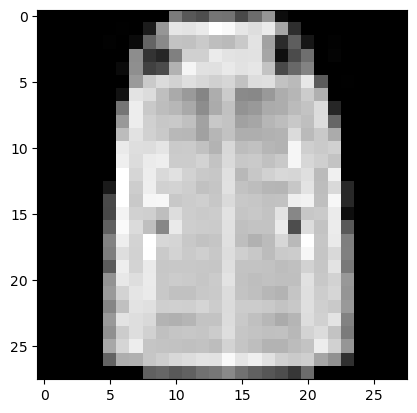

Label :  Coat


In [34]:
plt.imshow(img, cmap='gray')
plt.show()
lbl_idx = int(label.numpy())
print("Label : ", labels_map[lbl_idx])

### Custom dataset for file

In [2]:
import os
import pandas as pd
from torchvision.io import decode_image

In [ ]:
class CustomImageDataset(Dataset):  
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
  